In [1]:
import sys
sys.path.append('../')
from utils import *
import librosa
import pandas as pd
import json
# from fig3 import *

### Read metadata file

In [2]:
f = open('Data/metadata.json')
metadata = json.load(f)

In [3]:
# view metadata present in the file
metadata

{'start_time': 277,
 'duration': 17.7,
 'num_div': 4,
 'sarod_audio_path': 'Data/NIR_PrB_Jhinjhoti_2Gats_Sarod.wav',
 'mix_audio_path': 'Data/NIR_PrB_Jhinjhoti_2Gats_StereoMix.wav',
 'tabla_audio_path': 'Data/NIR_PrB_Jhinjhoti_2Gats_Tabla.wav',
 'cycle_file': 'Data/NIR_PrB_jhinjhoti_2Gats_Metre_Rupak.csv',
 'gat_annotation_file': 'Data/NIR_PrB_Jhinjhoti_2Gats_Annotation.csv',
 'onset_file': 'Data/NIR_PrB_Jhinjhoti_2Gats_Onsets_Selected_Rupak.csv',
 'annotation_keywords': ['SAROD', 'TABLA', 'INTERACTION'],
 'annotation_colors': ['orange', 'blue', 'purple']}

### Play the audio being analysed

In [4]:
playAudio(audioPath=metadata['mix_audio_path'], startTime=metadata['start_time'], duration=metadata['duration'])

### Initialise and populate the figure

In [12]:
%%capture
# initialise figure, with 3 subplots
fig, axs = generateFig(3, (14, 7), [2, 3, 3])

In [13]:
# plot waveplot
axs[0] = drawWave(audioPath=metadata['mix_audio_path'], startTime=metadata['start_time'], duration=metadata['duration'], ax=axs[0], annotate=False, cyclePath=metadata['cycle_file'], numDiv=metadata['num_div'], xlabel=False)
# plot spetogram 1
axs[1] = spectrogram(audioPath=metadata['sarod_audio_path'], startTime=metadata['start_time'], duration=metadata['duration'], cmap='Blues', ax=axs[1], yticks=True, annotate=False, xlabel=False, title='Sarod Spectrogram', xticks=False)
# plot spetogram 2
axs[2] = spectrogram(audioPath=metadata['tabla_audio_path'], startTime=metadata['start_time'], duration=metadata['duration'], cmap='Oranges', ax=axs[2], xticks=True, yticks=True, annotate=True, cyclePath=metadata['cycle_file'], numDiv=metadata['num_div'], xlabel=True, title='Tabla Spectrogram', yAnnot=0)
# add interaction annotation for spectograms 1 & 2
axs[1:3] = annotateInteraction(axs=axs[1:3], keywords=metadata['annotation_keywords'], cs=metadata['annotation_colors'], interactionFile=metadata['gat_annotation_file'], startTime=metadata['start_time'], duration=metadata['duration'])

/home/nithya/anaconda3/envs/osfVis/lib/python3.9/site-packages/librosa/display.py:848: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  out = axes.pcolormesh(x_coords, y_coords, data, **kwargs)


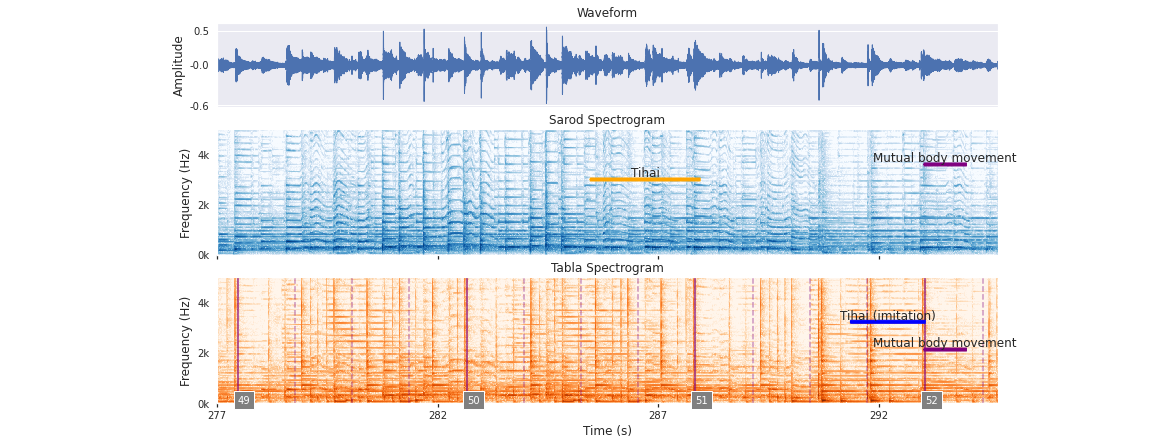

In [15]:
fig

In [17]:
fig.savefig('fig3.png')